<a href="https://colab.research.google.com/github/RanggaPtr/Computer-Vision-Semester-5/blob/main/modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0) Setup (Colab: install, mount, import, helper display)

In [17]:
# 0. Setup (jalankan di Colab)
!pip install --quiet opencv-python-headless

from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

# helper untuk menampilkan 1..N gambar secara rapi
def show_images(titles, imgs, figsize=(15,4)):
    n = len(imgs)
    plt.figure(figsize=figsize)
    for i, im in enumerate(imgs):
        plt.subplot(1, n, i+1)
        if im is None:
            plt.title(f"{titles[i]} (None)"); plt.axis('off'); continue
        if im.ndim == 3:
            plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(im, cmap='gray')
        plt.title(titles[i]); plt.axis('off')
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2) Load **image**

Shape: (1024, 1024, 3)  dtype: uint8


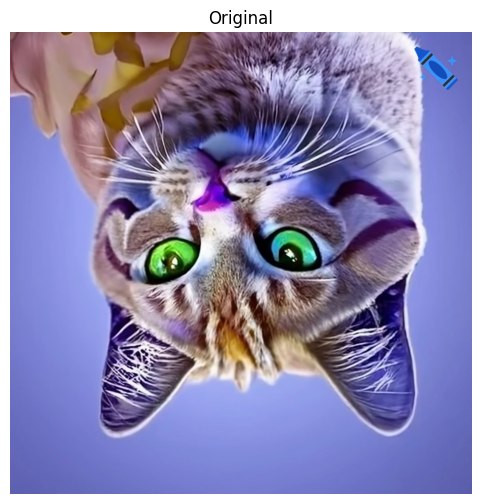

In [20]:

img_path = '/content/drive/MyDrive/Colab Notebooks/KULIAH/Computer Vision/iP6M96iuRNyT3l9xpczEzg.webp'

original = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
if original is None:
    raise FileNotFoundError("Gambar tidak ditemukan. Periksa img_path.")
print('Shape:', original.shape, ' dtype:', original.dtype)
show_images(['Original'], [original], figsize=(6,6))


# ) Helper functions (truncate, save)

In [21]:
def truncate_uint8(arr):
    """Truncate values to [0,255] and cast to uint8."""
    return np.clip(arr, 0, 255).astype(np.uint8)

def save_to_drive(img, path):
    cv2.imwrite(path, img)
    print('Saved to', path)


# practikum

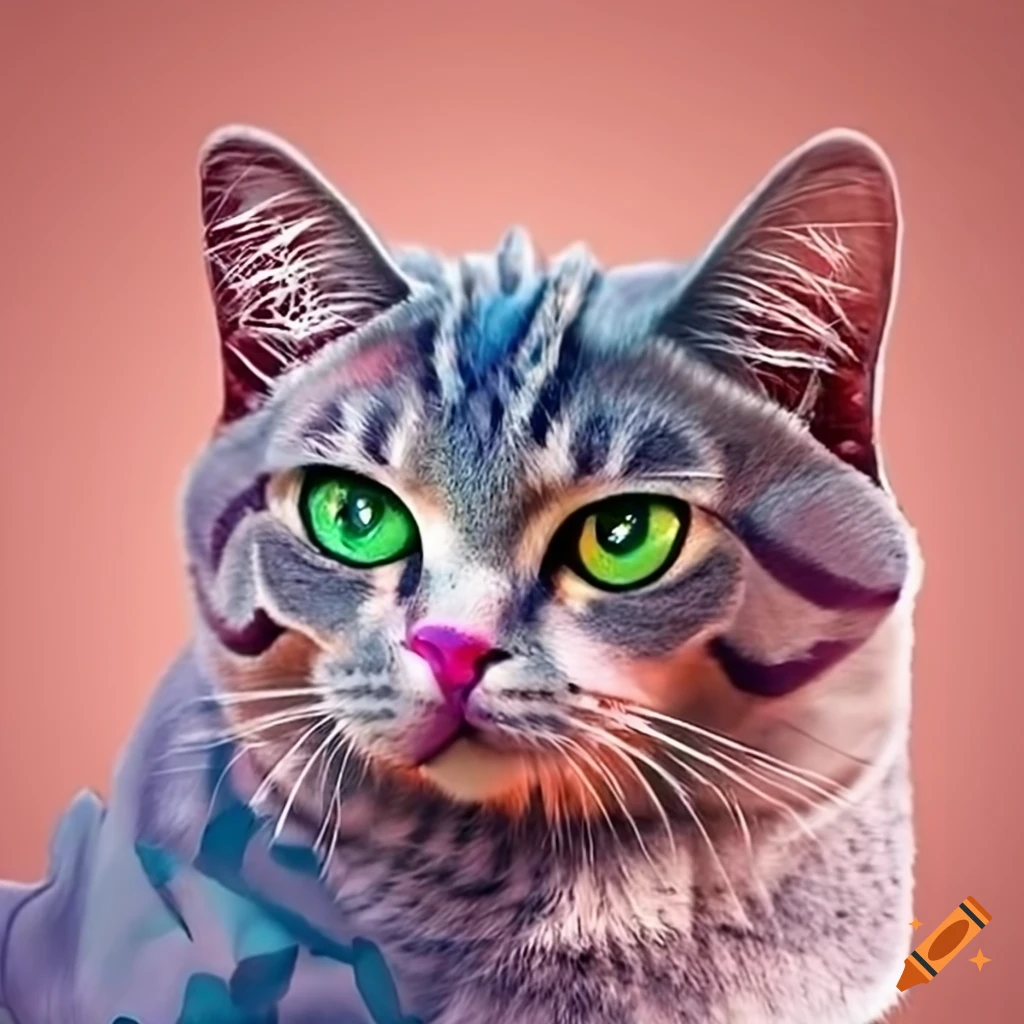

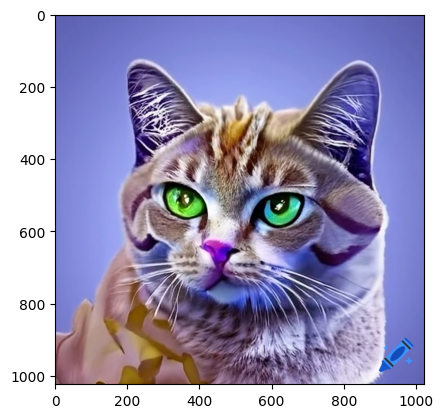

In [22]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
# baca gambar
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/KULIAH/Computer Vision/iP6M96iuRNyT3l9xpczEzg.webp')

# ubah ke RGB dan flip vertical (0 = flip sumbu Y)
img2 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)

# cara 1: tampilkan dengan cv2_imshow (khusus Colab)
cv2_imshow(img2)

# cara 2: tampilkan dengan matplotlib
plt.imshow(img2)
plt.axis("on")   # atau "off" kalau tanpa sumbu
plt.show()



# Transformasi Linier Brightness

 Mengubah tingkat kecerahan citra 
--------------------------------
Masukkan nilai kecerahan: 20


/tmp/ipython-input-932044261.py:15: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)


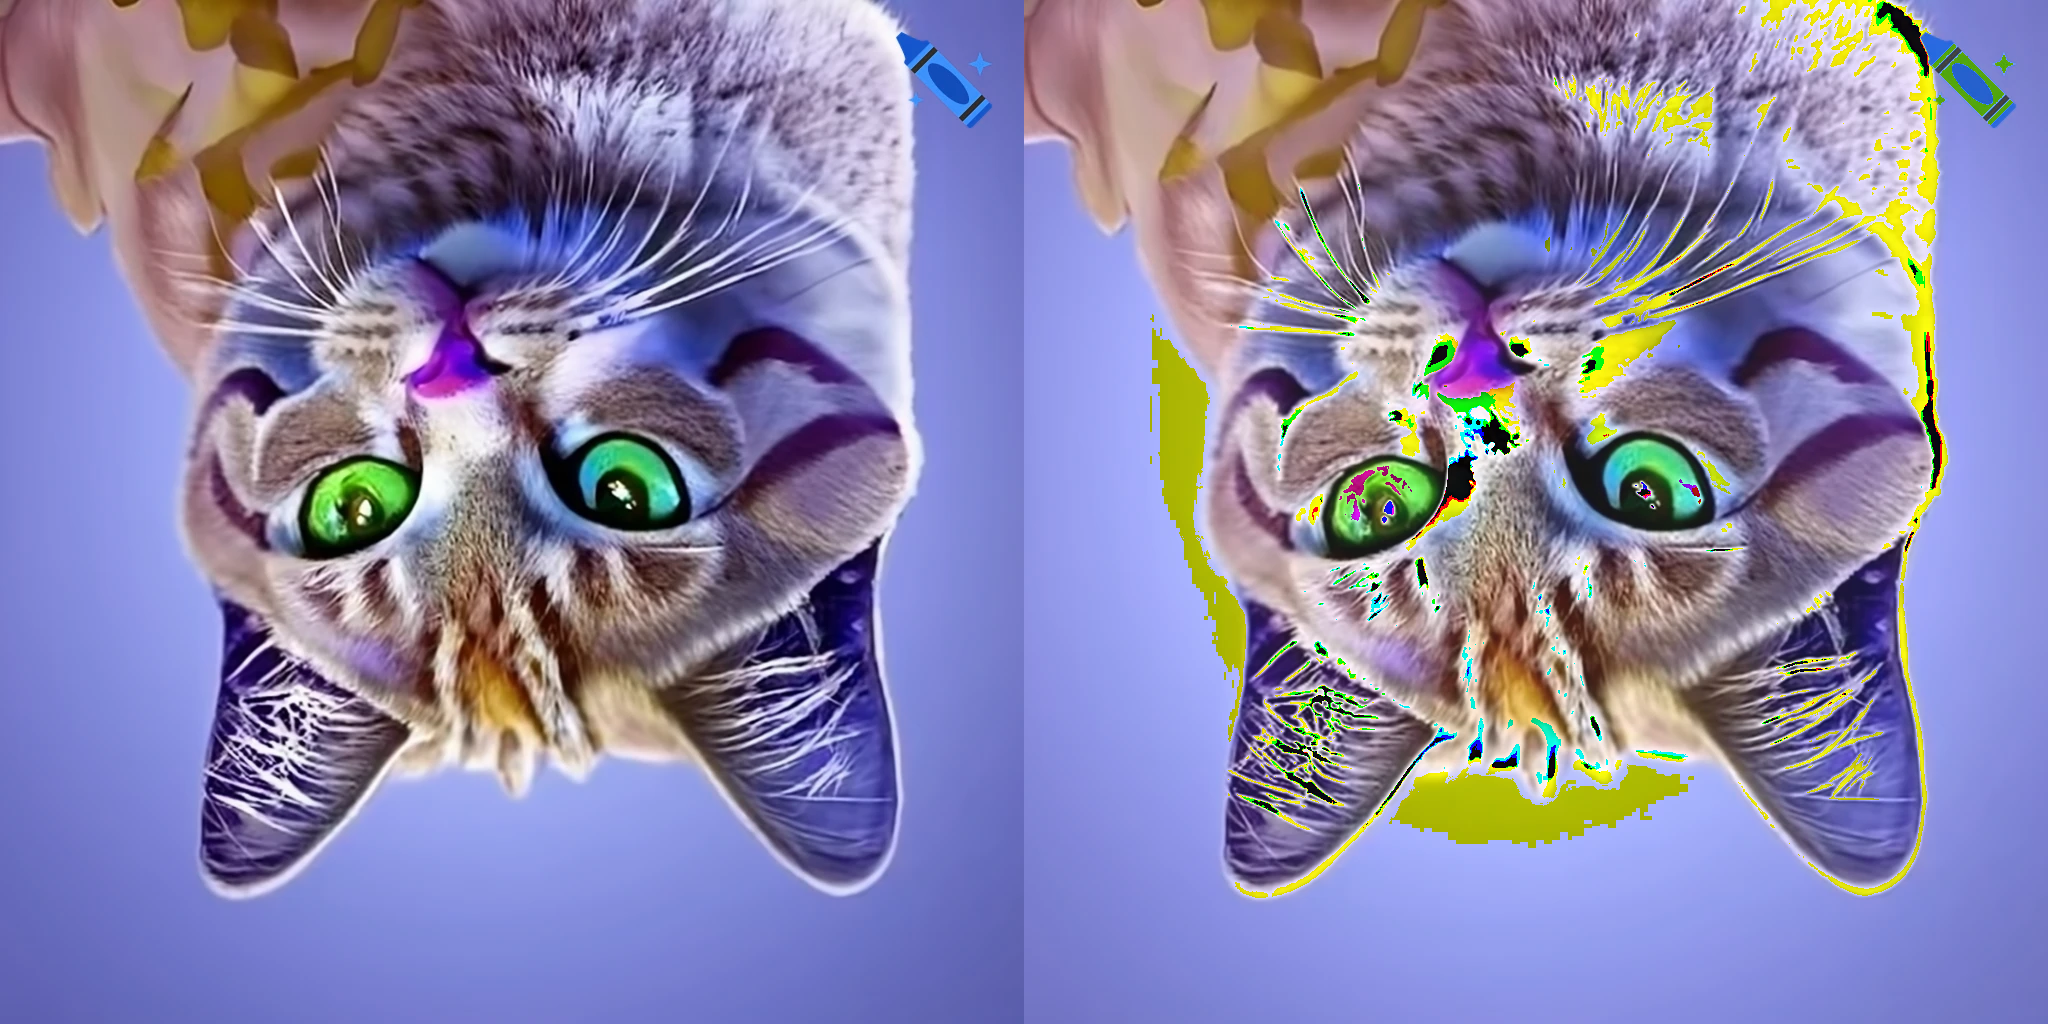

In [23]:
print(' Mengubah tingkat kecerahan citra ')
print('--------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/KULIAH/Computer Vision/iP6M96iuRNyT3l9xpczEzg.webp')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


# **TASK**

## Task 1 — Image Inverse (negative)

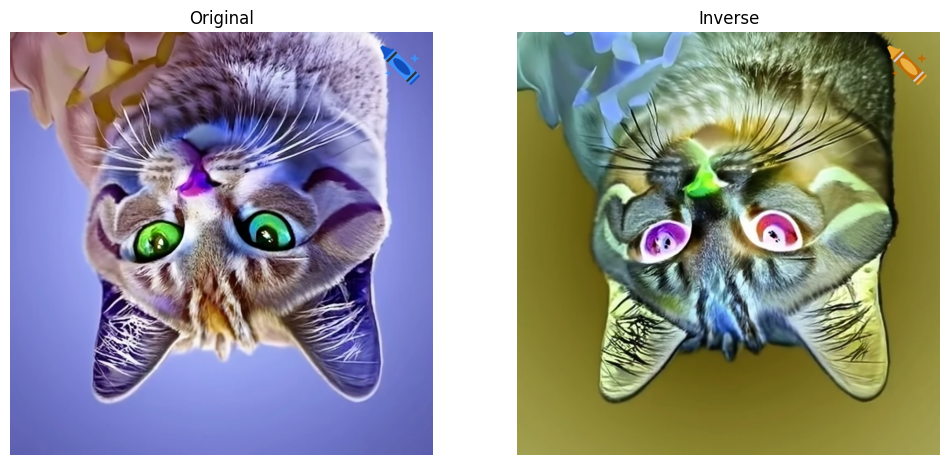

Saved to /content/drive/MyDrive/results_inverse.png


In [24]:
def inverse_image(img):
    return 255 - img

inv = inverse_image(original)
show_images(['Original', 'Inverse'], [original, inv], figsize=(12,6))

# simpan
save_to_drive(inv, '/content/drive/MyDrive/results_inverse.png')


## Task 2 — Linear brightness (ditunjukkan di modul)

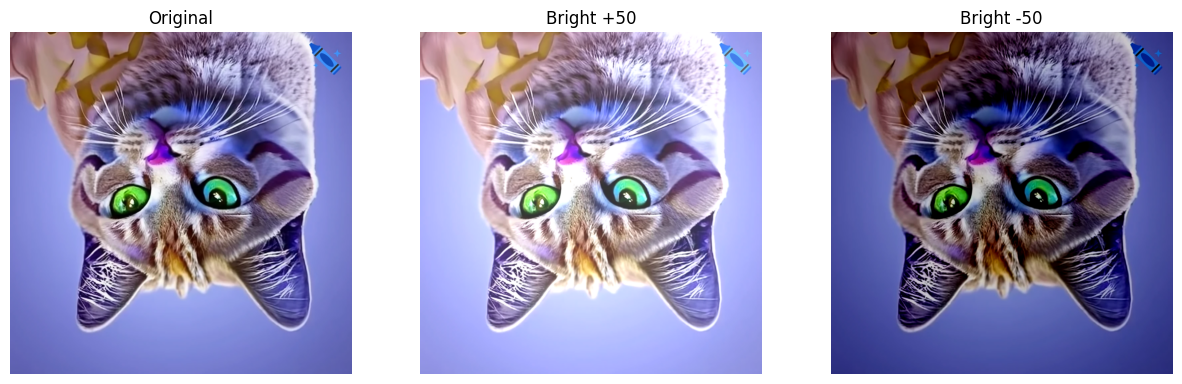

Saved to /content/drive/MyDrive/results_bright_plus.png
Saved to /content/drive/MyDrive/results_bright_minus.png


In [25]:
def linear_brightness(img, b):
    arr = img.astype(np.int32) + int(b)
    return truncate_uint8(arr)

# contoh: tambah +50 dan kurangi -50
bright_plus = linear_brightness(original, 50)
bright_minus = linear_brightness(original, -50)
show_images(['Original','Bright +50','Bright -50'], [original, bright_plus, bright_minus], figsize=(15,5))

save_to_drive(bright_plus, '/content/drive/MyDrive/results_bright_plus.png')
save_to_drive(bright_minus, '/content/drive/MyDrive/results_bright_minus.png')


## Task 3 — Contrast transformation (Contrast Correction Factor)

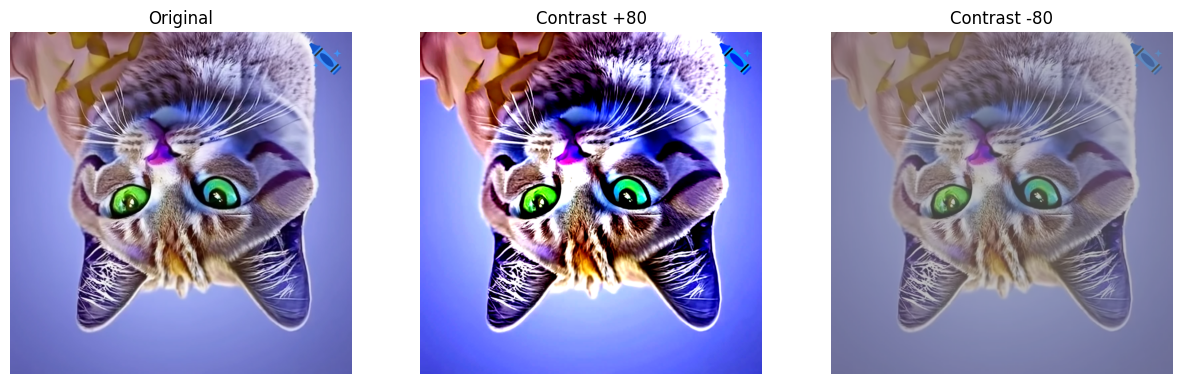

Saved to /content/drive/MyDrive/results_contrast_high.png
Saved to /content/drive/MyDrive/results_contrast_low.png


In [26]:
def contrast_transform(img, C):
    C = float(C)
    # hindari pembagi nol jika C = 259 (tidak valid)
    if abs(259.0 - C) < 1e-6:
        C = 258.9
    factor = (259.0 * (C + 255.0)) / (255.0 * (259.0 - C))
    arr = img.astype(np.float32)
    arr = factor * (arr - 128.0) + 128.0
    return truncate_uint8(arr)

# contoh: C=80 (naik kontras), C=-80 (turun kontras)
high_contrast = contrast_transform(original, 80)
low_contrast  = contrast_transform(original, -80)
show_images(['Original','Contrast +80','Contrast -80'], [original, high_contrast, low_contrast], figsize=(15,5))

save_to_drive(high_contrast, '/content/drive/MyDrive/results_contrast_high.png')
save_to_drive(low_contrast, '/content/drive/MyDrive/results_contrast_low.png')



## Task 4 — Logarithmic Brightness Transform

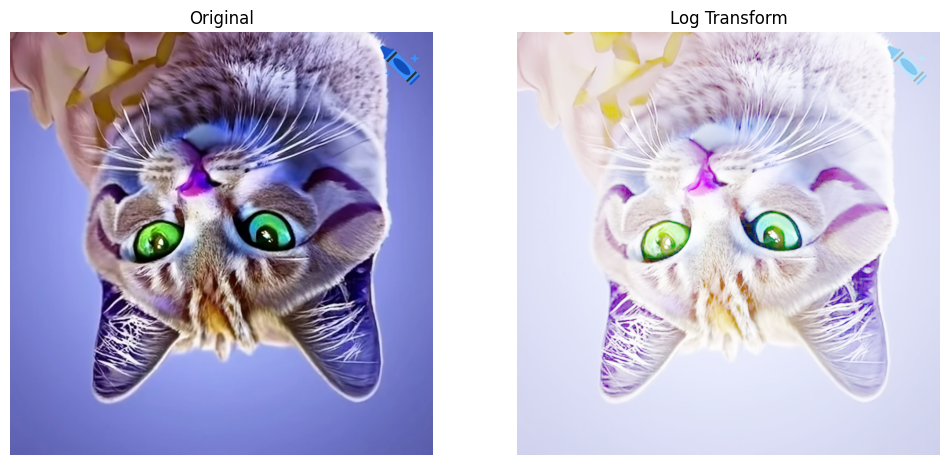

Saved to /content/drive/MyDrive/results_log.png


In [27]:
def log_transform(img):
    arr = img.astype(np.float32)
    c = 255.0 / np.log(1.0 + 255.0)
    result = c * np.log(1.0 + arr)
    return truncate_uint8(result)

log_img = log_transform(original)
show_images(['Original','Log Transform'], [original, log_img], figsize=(12,6))
save_to_drive(log_img, '/content/drive/MyDrive/results_log.png')


## Task 5 — Grayscale: Averaging, Lightness, Luminance

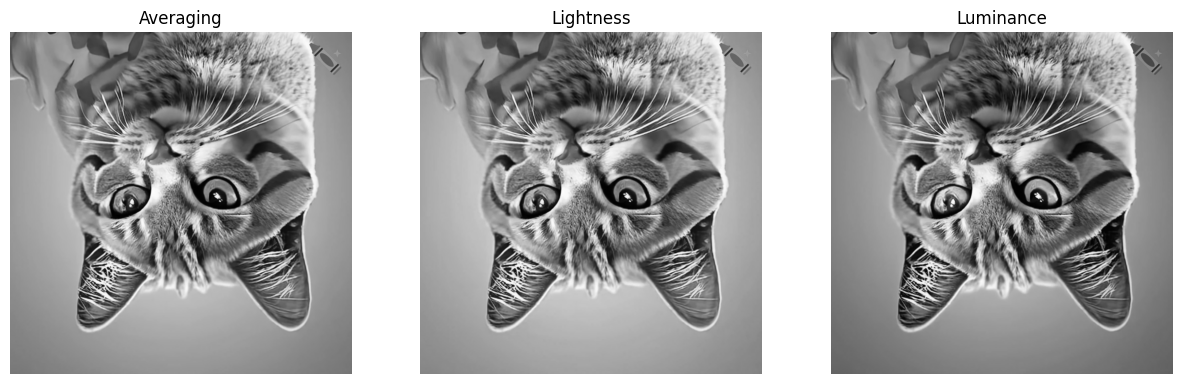

Saved to /content/drive/MyDrive/results_gray_avg.png
Saved to /content/drive/MyDrive/results_gray_light.png
Saved to /content/drive/MyDrive/results_gray_lum.png


In [28]:
def grayscale_methods(img):
    # img in BGR
    B = img[:,:,0].astype(np.float32)
    G = img[:,:,1].astype(np.float32)
    R = img[:,:,2].astype(np.float32)

    avg = ((R + G + B) / 3.0).astype(np.uint8)

    maxc = np.maximum(np.maximum(R, G), B)
    minc = np.minimum(np.minimum(R, G), B)
    light = ((maxc + minc) / 2.0).astype(np.uint8)

    lum = (0.21 * R + 0.72 * G + 0.07 * B).astype(np.uint8)

    return avg, light, lum

avg, light, lum = grayscale_methods(original)
show_images(['Averaging','Lightness','Luminance'], [avg, light, lum], figsize=(15,5))

save_to_drive(avg, '/content/drive/MyDrive/results_gray_avg.png')
save_to_drive(light, '/content/drive/MyDrive/results_gray_light.png')
save_to_drive(lum, '/content/drive/MyDrive/results_gray_lum.png')


## Task 6 — Show certain color (contoh: keep BLUE) & set other parts to grayscale

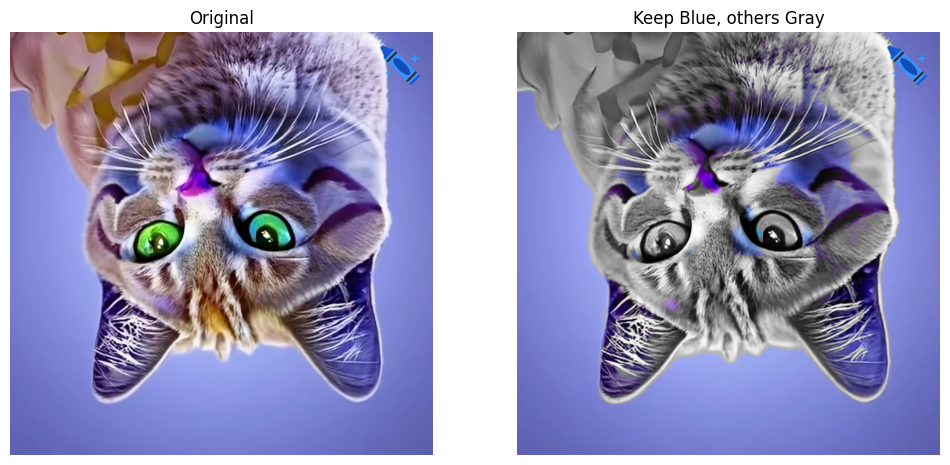

Saved to /content/drive/MyDrive/results_keep_blue.png


In [29]:
def preserve_color_and_gray(img, color='blue'):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    if color == 'blue':
        lower = np.array([100, 80, 50])
        upper = np.array([140, 255, 255])
        mask = cv2.inRange(hsv, lower, upper)
    elif color == 'green':
        lower = np.array([40, 40, 40]); upper = np.array([80, 255, 255])
        mask = cv2.inRange(hsv, lower, upper)
    elif color == 'red':
        # red wrap-around: two ranges
        lower1 = np.array([0, 70, 50]); upper1 = np.array([10,255,255])
        lower2 = np.array([170,70,50]); upper2 = np.array([180,255,255])
        mask = cv2.inRange(hsv, lower1, upper1)
        mask = cv2.bitwise_or(mask, cv2.inRange(hsv, lower2, upper2))
    else:
        raise ValueError('color must be one of blue/green/red')

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray3 = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    mask_3 = mask[:, :, None]
    result = np.where(mask_3 == 255, img, gray3)
    return result

res_blue = preserve_color_and_gray(original, 'blue')
show_images(['Original','Keep Blue, others Gray'], [original, res_blue], figsize=(12,6))
save_to_drive(res_blue, '/content/drive/MyDrive/results_keep_blue.png')


## Menyimpan semua hasil sekaligus

In [30]:
# contoh menyimpan semua hasil dalam folder results di Drive (folder harus ada)
import os
out_dir = '/content/drive/MyDrive/results'
os.makedirs(out_dir, exist_ok=True)

save_to_drive(inv, os.path.join(out_dir, 'inverse.png'))
save_to_drive(bright_plus, os.path.join(out_dir, 'bright_plus.png'))
save_to_drive(high_contrast, os.path.join(out_dir, 'contrast_high.png'))
save_to_drive(log_img, os.path.join(out_dir, 'log.png'))
save_to_drive(avg, os.path.join(out_dir, 'gray_avg.png'))
save_to_drive(res_blue, os.path.join(out_dir, 'keep_blue.png'))


Saved to /content/drive/MyDrive/results/inverse.png
Saved to /content/drive/MyDrive/results/bright_plus.png
Saved to /content/drive/MyDrive/results/contrast_high.png
Saved to /content/drive/MyDrive/results/log.png
Saved to /content/drive/MyDrive/results/gray_avg.png
Saved to /content/drive/MyDrive/results/keep_blue.png
